Цифровая (относительная,
нормированная) частота. Формально такая частота определяется как
отношение реальной частоты к частоте дискретизации:
$f_0 = F_0/F_д,$ где $F_д = 1/T$ - частота дискретизации,
T – интервал между отчетами сигнала.
Значение  $1/F_0$ точности
соответствует числу точек на период для гармонического сигнала.

#**Упражнения 1-2. Демонстрация теоремы Котельникова.**

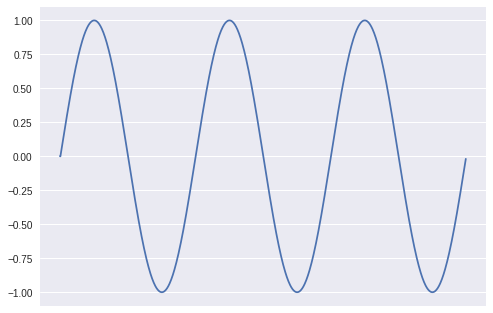

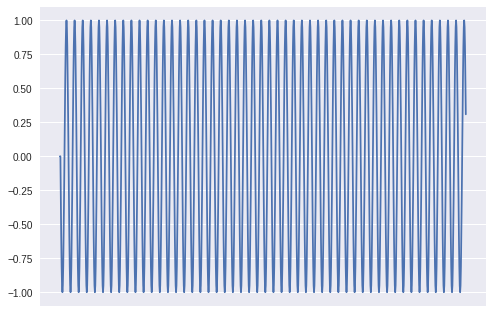

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact

#число периодов на отрезке
P1 = 3
P2 = 950
#количество точек на графике
N = 1000
k1 = P1/N
k2 = P2/N
#пустые массивы значений
X = np.array(0) 
Y = np.array(0)
Z = np.array(0)
w1, w2 = 1, 1 #частоты сигналов
#создание двух гармонических сигналов
#@interact(x=(0, 100))
def harm(x):
  A = np.array(0)
  for t in range(N):
    A = np.append(A, np.sin(2*np.pi*t*(x/N)))
  plt.plot(A)
  plt.xticks([])
  plt.show()
  return(A)


X = harm(x=P1)
Y = harm(x=P2)

#**Упражнение 3. Спектры синусоидального сигнала**
Обычно рассматривают амплитудный, фазовый и
энергетический спектры. Мы остановимся на первом и последнем. Энергетический получается возведением в квадрат амплитудного. В случе цифровых сигналов, спектр получают, используя дискретное преобразование
Фурье (или оптимизированный алгоритм быстрого преобразования Фурье).

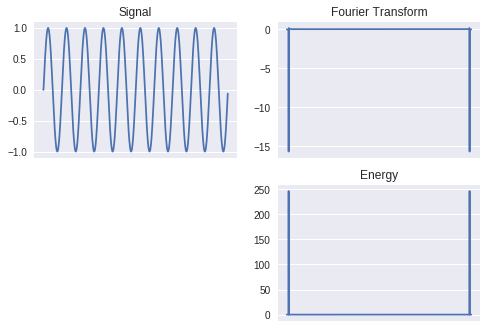

1231234


In [0]:
import numpy as np
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X = np.array(0) 
S = np.array(0)
w1, w2 = 1, 1 #частоты сигналов

#создание гармонического сигнала
for t in range(N):
  X = np.append(X, np.sin(2*np.pi*w1*t*k))

S = np.fft.fft(X)
plt.subplot(221)
plt.title('Signal')
plt.plot(X)
plt.xticks([])
plt.subplot(222)
plt.title('Fourier Transform')
plt.xticks([])
plt.plot(np.real(S))
plt.subplot(224)
plt.title('Energy')
plt.xticks([])
plt.plot(np.real(S)**2)
plt.show()
print(1231234)

#Упражнение 4. Импульсная и частотная характеристики цифровых фильтров.
Под цифровым фильтром мы будет понимать дискретную систему с постоянными параметрами, причем ограничимся линейными системами. В таком случае система будет описываться уравнением
$y(n) = -\sum_{k=1}^N a(k)y(n-k)+\sum_{k=0}^M b(k)x(n-k)$

Где x (n) – отсчеты входного сигнала,

y(n)- отсчеты сигнала на выходе системы,

a(k), b(k) – коэффициенты фильтра,

N и M+1 – количество параметров a(k), b(k) соответственно. 

Максимальное число из N и M называется порядком фильтра.

Использование функции **scipy.signal.iirdesign**:

Passband and stopband edge frequencies. For digital filters, these are in the same units as fs. By default, fs is 2 half-cycles/sample, so these are normalized from 0 to 1, where 1 is the Nyquist frequency. For example:

Lowpass: wp = 0.2, ws = 0.3
Highpass: wp = 0.3, ws = 0.2
Bandpass: wp = [0.2, 0.5], ws = [0.1, 0.6]
Bandstop: wp = [0.1, 0.6], ws = [0.2, 0.5]

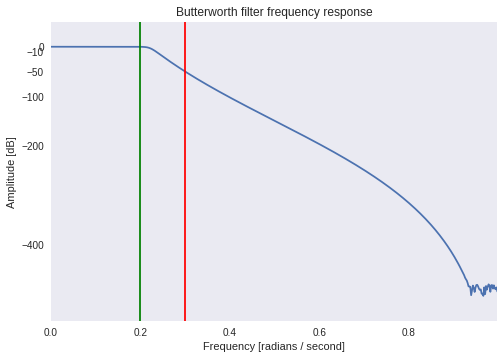

In [0]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X = np.array(0) 
S = np.array(0)
#частота пропускания и частота заграждения
wp, ws = 0.2, 0.3
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

b, a = signal.iirdesign(wp, ws, gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a)
plt.plot(w/np.pi, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.yticks([-400, -200, -100, -50, -10, 0])
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green') # cutoff frequency
plt.axvline(ws, color='red') # cutoff frequency
plt.show()

#Упражнение 5. Сумма и разность отсчетов как цифровые фильтры
Выполнение простейших манипуляций, таких как сложение и вычитание соседних отсчетов, позволительно рассматривать как простые системы, являющиеся цифровыми фильтрами. При этом в зависимости от операции будут получаться фильтры разного типа.
1. Система, реализующая суммирование 10 отчетов (10 выбрано для наглядности, можно было взять любое число от 2 до N) является интегратором или ФНЧ, а также усреднителем. Сдвиг выходного сигнала обусловлен необходимостью накопления данных, т.е данные из прошлого сигнала дают значения на выходе в будущем.
2. Система, реализующая вычитание отсчетов является диффернцирующей схемой или фильтром высоких частот, что объясняет превращение синуса на ее входе в косинус на выходе.

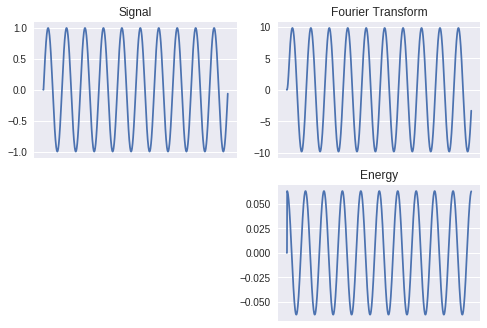

1231234


In [0]:
import numpy as np
import matplotlib.pyplot as plt

#число периодов на отрезке
P = 10
#количество точек на графике
N = 1000
k = P/N
#пустые массивы значений
X1 = np.array(0) 
S1 = np.array(0)
X2 = np.array(0) 
S2 = np.array(0)
buff_2 = np.zeros(10)
X3 = np.array(0) 
S3 = np.array(0)
buff_3 = np.zeros(2)
w1, w2 = 1, 1 #частоты сигналов

#создание гармонического сигнала
for t in range(N):
  X1 = np.append(X1, np.sin(2*np.pi*w1*t*k))
  
for t in range(N):
  buff_2 = np.roll(buff_2, 1)
  buff_2[0] = np.sin(2*np.pi*w1*t*k)
  X2 = np.append(X2, np.sum(buff_2))
  
for t in range(N):
  buff_3 = np.roll(buff_3, 1)
  buff_3[0] = np.sin(2*np.pi*w1*t*k)
  X3 = np.append(X3, np.diff(buff_3[::-1]))

#S = np.fft.fft(X1)
plt.subplot(221)
plt.title('Signal')
plt.plot(X1)
plt.xticks([])
plt.subplot(222)
plt.title('Fourier Transform')
plt.xticks([])
plt.plot(X2)
plt.subplot(224)
plt.title('Energy')
plt.xticks([])
plt.plot(X3)
plt.show()
print(1231234)

#Упражнение 6. Сравнение селективности КИХ и БИХ фильтров
Основная классификация цифровых фильтров происходит по ограниченности импульсной характеристики: фильтры с конечной импульсной характеристикой называют КИХ-фильтрами (FIR, они, как правило, трансверсальные, т.е. не имеют обратной связи); в противовес им фильтры с бесконечной импульсной характеристикой (БИХ, IIR) обладают обратной связью и еще называются рекурсивными. Формальное отличие один от других в том, что коэффициенты a(k)≡0 для k=1,… N. Существует много особенностей, характерных для фильтров каждого из перечисленных типов, но в этом упражнении мы остановимся на одном отличии этих типов фильтров-селективности АЧХ, т.е. способности лучше выделять спектральные компоненты сигнала в определенной полосе частот.
Строго говоря, в этом примере вычисляется не АЧХ фильтров, а его квадрат, но для качественной оценки это роли не играет. Установите одну и ту же граничную частоту и элементом управления задаем один и тот же порядок обоих фильтров (БИХ и КИХ).

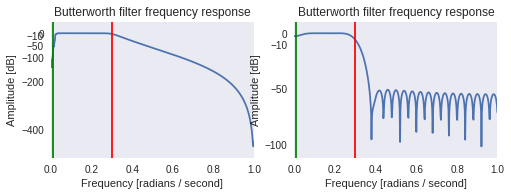

In [0]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N

#частота пропускания и частота заграждения
wp, ws = 0.01, 0.3
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

order_of_the_filter =10

b, a = signal.iirfilter(order_of_the_filter, [wp,ws], gpass, gstop, analog=False, ftype='butter', output='ba')
w, h = signal.freqz(b, a)

b2 = signal.firwin(50, [wp,ws], pass_zero=False)
w2, h2 = signal.freqz(b2)

plt.subplot(221)
plt.plot(w/np.pi, 20*np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.yticks([-400, -200, -100, -50, -10, 0])
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green') # cutoff frequency
plt.axvline(ws, color='red') # cutoff frequency

plt.subplot(222)
plt.plot(w/np.pi, 20*np.log10(abs(h2)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.yticks([-400, -200, -100, -50, -10, 0])
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green') # cutoff frequency
plt.axvline(ws, color='red') # cutoff frequency
plt.show()

#Упражнение 7. Пример неустойчивого фильтра. Устранение неустойчивости заменой одного фильтра каскадом из фильтров 2 порядка
Одно из свойств, характерное только для БИХ-фильтров – их потенциальная неустойчивость. Она проявляется в том, что при конечном входном сигнале получается бесконечный отклик. Известен способ борьбы с таким эффектом – замена одного фильтра высокого порядка каскадом из звеньев 2-го порядка.
Если значение порядка будет установлено малым, то на обоих графиках будет гармонический сигнал, как на нижнем графике рисунка 7б, но без нулевых отчетов в левой части (т.е без ощутимого сдвига, задержки). Увеличивайте порядок до тех пор, пока сигнал на верхнем графике не перестанет быть гармоническим. Такой эффект произойдет, когда порядок станет больше 50-ти. Выходной же сигнал каскадного соединения таких же фильтров второго порядка остается гармоническим, но повергается заметному сдвигу.
1. БИХ-фильтры могут быть неустойчивыми, что обусловлено наличием обратной связи.
2. БИХ-фильтры 2-го порядка заведомо устойчивы, их каскадное содинение предпочтительно фильтру высокого порядка.

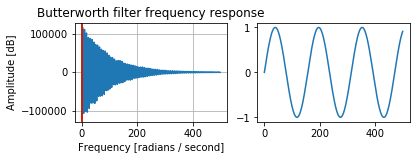

In [6]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 50

signal_1 = np.sin(np.linspace(0, 20, 500))
b1, a1 = signal.butter(order_of_the_filter, 0.30, analog=False)
imp_ff_1 = signal.filtfilt(b1, a1, signal_1)

signal_2 = np.sin(np.linspace(0, 20, 500))
b2, a2 = signal.butter(2, 0.30, analog=False)
imp_ff_2 = signal.filtfilt(b2, a2, signal_2)
for i in range(int(np.log2(order_of_the_filter))):
  imp_ff_2 = signal.filtfilt(b2, a2, imp_ff_2)
#print(imp_ff)
#h = signal.decimate(signal, signal.iirfilter(order_of_the_filter, [wp,ws], gpass, gstop, analog=False, ftype='butter', output='ba'), 1, ftype='iir')
# b, a = signal.iirfilter(order_of_the_filter, [wp,ws], gpass, gstop, analog=False, ftype='butter', output='ba')
# w, h = signal.freqz(b, a)


plt.subplot(2, 2, 1)
plt.plot(imp_ff_1)
#plt.ylim(-1, 1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
# plt.yticks([-400, -200, -100, -50, -10, 0])
# plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(wp, color='green') # cutoff frequency
plt.axvline(ws, color='red') # cutoff frequency

plt.subplot(2, 2, 2)
plt.plot(imp_ff_2)
plt.show()

#Упражнение 8. Пример получения неказуальной системы при занулении отчетов спектра
Рассмотрим пример манипуляций со спектром сигнала, которые могли бы быть альтернативой фильтрации. Известно, что при прохождении сигнала через фильтр, его спектр подвергается преобразованию вида:

$Y(e^{jω})=H(e^{j\omega})X(e^{j\omega})$

Где $Y(e^{jω})$ – спектр выходного сигнала,
$X(e^{j\omega})$ – спектр входного сигнала,
$H(e^{j\omega}$ – частотная характеристика фильтра.
Тем самым правильно подобрав алгоритм трансформации спектра, можно выполнить математически эквивалентное преобразование без использования фильтрации, т.е. операций, какие заложены в разностное уравнение. Вычисление коэффициентов фильтра зачастую самая сложная часть задачи фильтрации, поэтому возникает соблазн в альтернативном способе, сводящемся к вычислению сигнала из преобразованного спектра. Однако такой подход таит опасность получения физически неадекватного решения. Как вариант, можно получить выходной сигнал, нарушающий принцип причинности, т.е. отклик системы будет начинаться раньше, чем возникло воздействие. Такую систему принят называть неказуальной.

Константы 511 и 257 подобраны неспроста. Цель манипуляций с компонентами из пунктов 4 и 5, занулить равное количество элементов в левой и правой половине спектра, чтобы после обратного Фурье-преобразования получился вещественный сигнал. При этом мы без необходимости присваиваем нулю N/2+1 –ый элемент, что некритично.
Запустите прибор. Вы увидите сигнал в виде меандра, его АЧХ, тот же АЧХ с половиной зануленных отсчетов и соответствующий такому спектру сигнал. Вы можете ограничить шкалу по оси x на нижнем левом рисунке сотней с небольшим отчетов. Обратите внимание! У исходного сигнала первые 100 отсчетов нулевые, а после наших преобразований они стали ненулевыми, начиная с первого – нарушился принцип причинности! Значит наша система получилась неказуальной.

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


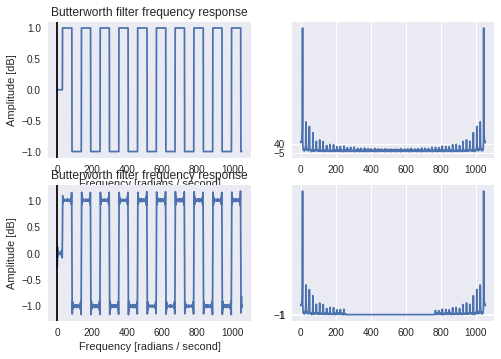

In [0]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft



order_of_the_filter = 50

signal_1 = np.concatenate((np.zeros(30), signal.square(np.linspace(0, 60, 1024))))
spectr = np.fft.fft((signal_1))
changed_spektr = np.fft.fft(np.real(signal_1))
changed_spektr[257:765] = 0
signal_2 = np.fft.ifft(changed_spektr)


plt.subplot(2, 2, 1)
plt.plot(signal_1)
#plt.ylim(-1, 1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(np.abs(spectr))
plt.yticks([-5, 40])

plt.subplot(2, 2, 3)
plt.plot(signal_2)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency

plt.subplot(2, 2, 4)
plt.plot(np.abs(changed_spektr))
plt.yticks([-1, 1])
plt.show()

#Упражнение 9. Фильтрация меандра
Используя стандартные цифровые фильтры, можно избавляться от ненужных спектральных компонент.

Обратите внимание на линейчатый характер спектра. Установите частоту меандра примерно равной граничной частоте фильтра и пронаблюдайте, во что превратился выходной сигнал. По мере уменьшения граничной частоты фильтра, вы можете наблюдать ослабление высоких гармоник меандра. Когда все гармоники, кроме первой, будут достаточно подавлены, выходной сигнал будет по форме близок к синусоидальному.

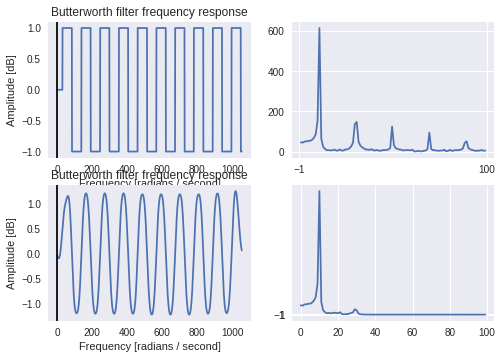

In [0]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 7

signal_1 = np.concatenate((np.zeros(30), signal.square(np.linspace(0, 60, 1024))))
spectr_1 = np.fft.fft(signal_1)

signal_2 = np.concatenate((np.zeros(30), signal.square(np.linspace(0, 60, 1024))))
b1, a1 = signal.butter(order_of_the_filter, 0.05, analog=False, btype='lowpass')
imp_ff_1 = signal.filtfilt(b1, a1, signal_2)
spectr_2 = np.fft.fft(imp_ff_1)

plt.subplot(2, 2, 1)
plt.plot(signal_1)


plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(np.abs(spectr_1[:100]))
plt.xticks([-1, 100])

plt.subplot(2, 2, 3)
plt.plot(imp_ff_1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency

plt.subplot(2, 2, 4)
plt.plot(np.abs(spectr_2[:100]))
plt.yticks([-1, 1])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


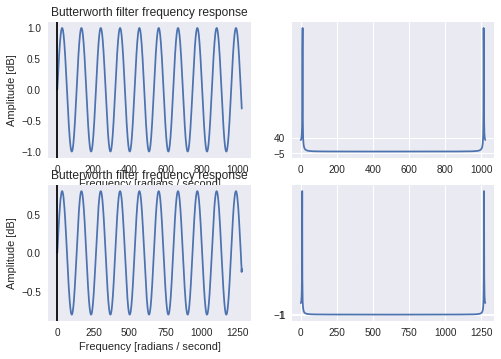

In [0]:
#@title 10
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 50

#signal_1 = np.concatenate((np.zeros(30), signal.square(np.linspace(0, 60, 1024))))
signal_1 =  np.sin(np.linspace(0, 60, 1024))
spectr = np.fft.fft((signal_1))
changed_spektr = np.fft.fft(signal_1)
changed_spektr = np.insert(changed_spektr, 512, np.zeros(255))
signal_2 = np.fft.ifft(changed_spektr)


plt.subplot(2, 2, 1)
plt.plot(signal_1)
#plt.ylim(-1, 1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(np.abs(spectr))
plt.yticks([-5, 40])

plt.subplot(2, 2, 3)
plt.plot(signal_2)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency

plt.subplot(2, 2, 4)
plt.plot(np.abs(changed_spektr))
plt.yticks([-1, 1])
plt.show()

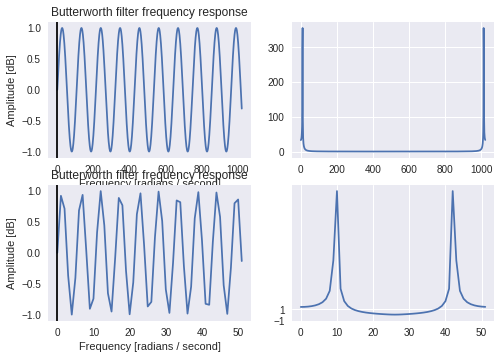

In [0]:
#@title 11
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 50

decimate = 20

signal_1 =  np.sin(np.linspace(0, 60, 1024))
spectr = np.fft.fft((signal_1))
signal_2 = signal_1[::decimate]
changed_spectr = np.fft.fft(signal_2)


plt.subplot(2, 2, 1)
plt.plot(signal_1)
#plt.ylim(-1, 1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(np.abs(spectr))


plt.subplot(2, 2, 3)
plt.plot(signal_2)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency

plt.subplot(2, 2, 4)
plt.plot(np.abs(changed_spectr))
plt.yticks([-1, 1])
plt.show()

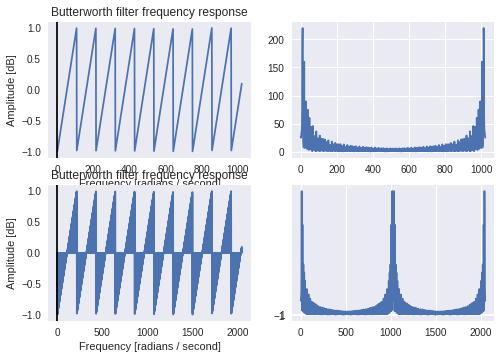

In [0]:
#@title 12
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 50

increment = 2
signal_1 =  signal.sawtooth(np.linspace(0, 60, 1024))
spectr = np.fft.fft((signal_1))
signal_2 = signal_1
for i in range(0,len(signal_2)*increment, increment):
  signal_2 = np.insert(signal_2, i, 0)
changed_spectr = np.fft.fft(signal_2)


plt.subplot(2, 2, 1)
plt.plot(signal_1)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(np.abs(spectr))


plt.subplot(2, 2, 3)
plt.plot(signal_2)
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency

plt.subplot(2, 2, 4)
plt.plot(np.abs(changed_spectr))
plt.yticks([-1, 1])
plt.show()

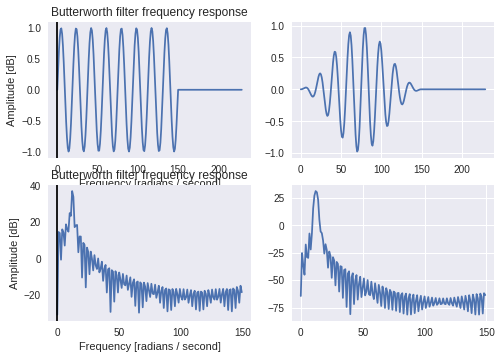

In [0]:
#@title 13
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


order_of_the_filter = 50

increment = 2
signal_1 =  np.concatenate((np.sin(np.linspace(0, 50, 150)),np.zeros(80)))
signal_2 =  np.sin(np.linspace(0, 50, 150))
hann_window = signal.barthann(150)
signal_with_hann_window = signal_2 * hann_window 
signal_with_hann_window = np.concatenate((signal_with_hann_window,np.zeros(80)))
#spectr = np.fft.fft((signal_1))

spectr = np.fft.fft(signal_1)
spectr_with_spectr_hann = np.fft.fft(signal_with_hann_window)



plt.subplot(2, 2, 1)
plt.plot(signal_1)

plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency
plt.subplot(2, 2, 2)
plt.plot(signal_with_hann_window)


plt.subplot(2, 2, 3)
#plt.yticks([1e-10, 1e-8, 1e-6, 0.0001, 0.01, 0])
#plt.margins(0, 0.1)
plt.plot(20*np.log10(abs(spectr[:150])))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.axvline(0, color='black') # cutoff frequency


plt.subplot(2, 2, 4)
plt.plot(20*np.log10(abs(spectr_with_spectr_hann[:150])))
#plt.yticks([-1, 1])
plt.show()

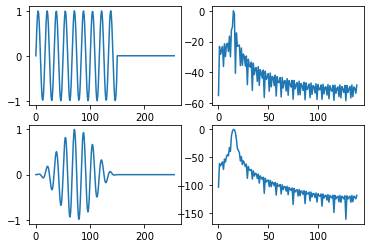

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


S11 = np.sin(np.linspace(0, 56, 150))
S1 = np.insert(S11, 150, np.zeros(106))
spectrS1 = np.fft.fft(S1)
spectrS1 = abs(spectrS1)**2
spectrS1 = spectrS1/max(spectrS1)
meanSpectrS1 = 10*np.log10(spectrS1)

plt.subplot(221)
plt.plot(S1)
plt.subplot(222)
plt.plot((meanSpectrS1[0:140]))
#plt.yticks([])

lenWin = (len(S11));
hannWin = signal.get_window('hann', lenWin, fftbins=True)
S22 = S11*hannWin
S2 = np.insert(S22, 150, np.zeros(106))
spectrS2 = np.fft.fft(S2)
spectrS2 = abs(spectrS2)**2
spectrS2 = spectrS2/max(spectrS2)
meanSpectrS2 = 10*np.log10(spectrS2)

plt.subplot(223)
plt.plot(S2)
plt.subplot(224)
plt.plot((meanSpectrS2[0:140]))

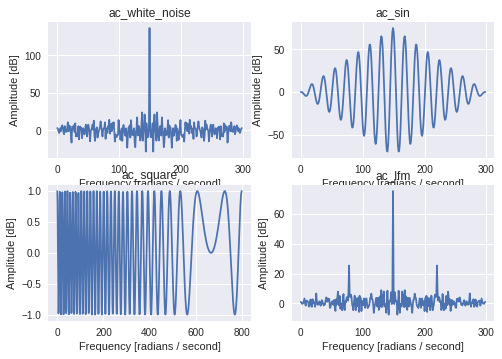

In [0]:
#@title 14
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


mean = 0
std = 1 
num_samples = 150
samples = np.random.normal(mean, std, size=num_samples)
ac_white_noise = np.correlate(samples, samples, mode='full')

samples = np.sin(np.linspace(0, 50, 150))
ac_sin = np.correlate(samples, samples, mode='full')

samples = signal.square(np.linspace(0, 50, 150))
ac_square = np.correlate(samples, samples, mode='full')

samples = signal.chirp(np.linspace(0, 50, 150), f0=6, f1=1, t1=10, method='linear')
samplesq = signal.chirp(np.linspace(0, 15, 800), f0=5, f1=1, t1=10, method='linear')
ac_lfm = np.correlate(samples, samples, mode='full')


plt.subplot(2, 2, 1)
plt.plot(ac_white_noise)
plt.title('ac_white_noise')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.subplot(2, 2, 2)
plt.plot(ac_sin)
plt.title('ac_sin')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.subplot(2, 2, 3)
plt.plot(samplesq)
plt.title('ac_square')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 2, 4)
plt.plot(ac_lfm)
plt.title('ac_lfm')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

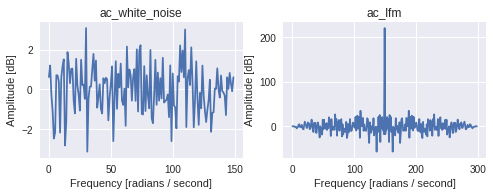

In [0]:
#@title 15
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft



mean = 0
std = 1 
num_samples = 150
samples = np.random.normal(mean, std, size=num_samples)
samples = signal.chirp(np.linspace(0, 50, 150), f0=6, f1=1, t1=10, method='linear') + samples
ac_acf = np.correlate(samples, samples, mode='full')



plt.subplot(2, 2, 1)
plt.plot(samples)
plt.title('ac_white_noise')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 2, 2)
plt.plot(ac_acf)
plt.title('ac_lfm')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

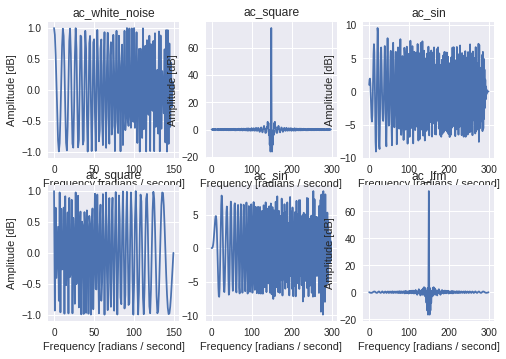

In [0]:
#@title 16
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal
from numpy.fft import rfft


samples_1 = signal.chirp(np.linspace(0, 11, 150), f0=1, f1=6, t1=10, method='linear')
ac_a_conv_f_1 = signal.convolve(samples_1, samples_1, mode='full')
ac_acf_1 = np.correlate(samples_1, samples_1, mode='full')

samples_2 = signal.chirp(np.linspace(0, 11, 150), f0=6, f1=1, t1=10, method='linear')
ac_s_conv_f_2 = signal.convolve(samples_2[::-1], samples_2[::-1], mode='full')
ac_acf_2 = np.correlate(samples_2[::-1], samples_2[::-1], mode='full')


plt.subplot(2, 3, 1)
plt.plot(samples_1)
plt.title('ac_white_noise')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 3, 5)
plt.plot(ac_s_conv_f_2)
plt.title('ac_sin')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.subplot(2, 3, 2)
plt.plot(ac_acf_1)
plt.title('ac_square')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 3, 3)
plt.plot(ac_a_conv_f_1)
plt.title('ac_sin')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')


plt.subplot(2, 3, 4)
plt.plot(samples_2)
plt.title('ac_square')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(2, 3, 6)
plt.plot(ac_acf_2)
plt.title('ac_lfm')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


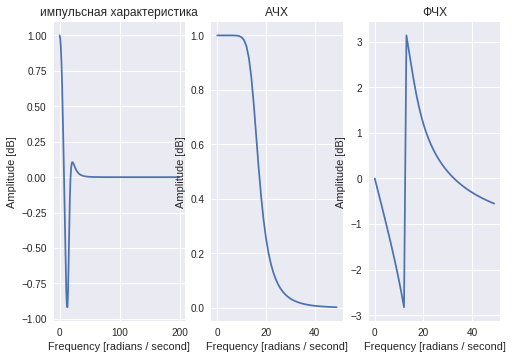

In [0]:
#@title 17
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 15
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X1 = np.array(0) 
S1 = np.array(0)
X2 = np.array(0) 
S2 = np.array(0)
#частота пропускания и частота заграждения
wp, ws = 0.01, 0.2
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

order_of_the_filter =5

# signal = np.zeros(100)
# signal[0] = 1
# signal_2 = np.zeros(100)
# b2, a2 = signal.butter(5, 0.20, analog=False)
# w1, h1 = signal.freqz(b2, a2)

# b2, a2 = signal.iirfilter(order_of_the_filter, [wp,ws], gpass, gstop, analog=False, ftype='butter', output='ba')

# w2, h2 = signal.freqz(b2, a2)
# S = np.fft.fft(h2)

wn  = k/(10*0.5)
b, a = signal.butter(order_of_the_filter, wn, 'low')
w, h = signal.freqz(b, a)
#S = np.fft.ifft(h)

plt.subplot(1, 3, 1)
plt.plot(h[:200])
plt.title('импульсная характеристика')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 2)
plt.plot(np.abs(h[:50]))
plt.title('АЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 3)
#plt.plot(np.imag(S[:50]))
plt.plot(np.angle(h[:50]))
plt.title('ФЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

e:\program\python\3.8.1\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


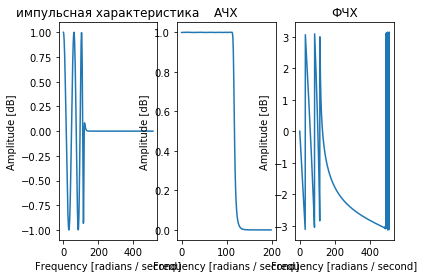

In [1]:
#@title 18
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal




b, a = signal.cheby1(14, 0.01, 0.22, 'low', analog=False)
w, h = signal.freqz(b, a)


plt.subplot(1, 3, 1)
plt.plot((h))
#plt.plot(h[:100])
plt.title('импульсная характеристика')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 2)
plt.plot(np.abs(h[:200]))
plt.title('АЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 3)
plt.plot(np.angle(h))
plt.title('ФЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


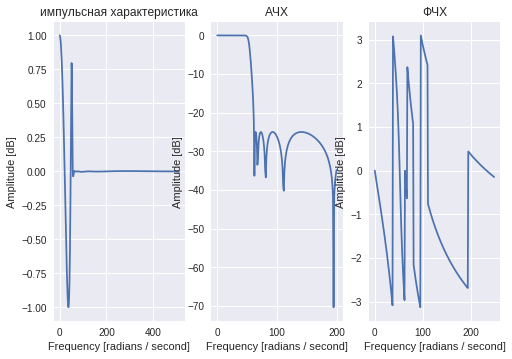

In [37]:
#@title 18
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal




#частота пропускания и частота заграждения
wp, ws = 0.01, 0.2
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

order_of_the_filter =24


b, a = signal.cheby2(11, 50, 0.12, 'low', analog=False)
w, h = signal.freqz(b, a)


plt.subplot(1, 3, 1)
plt.plot((h))
#plt.plot(h[:100])
plt.title('импульсная характеристика')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 2)
plt.plot(10*np.log10(abs(h[:200])))
plt.title('АЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 3)
plt.plot(np.angle(h[:250]))
plt.title('ФЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


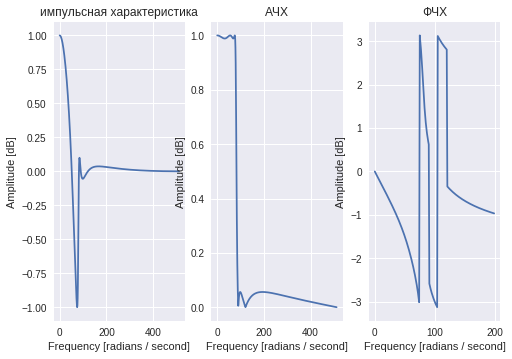

In [27]:
#@title 20
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 10
#количество точек на графике
N = 100
k = P/N
#пустые массивы значений
X1 = np.array(0) 
S1 = np.array(0)
X2 = np.array(0) 
S2 = np.array(0)
#частота пропускания и частота заграждения
wp, ws = 0.01, 0.2
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

order_of_the_filter =11

#b2, a2 = signal.iirfilter(order_of_the_filter, [wp,ws], gpass, gstop, analog=False, ftype='cheby1', output='ba')
# b2, a2 = signal.ellip(order_of_the_filter, 0.01, 0.2, 0.1, 'lowpass', analog=False)
# w2, h2 = signal.freqz(b2, a2)
# S = np.fft.fft(h2)




b, a = signal.ellip(5, 0.1, 25, 0.15, analog=False)
w, h = signal.freqz(b, a)


plt.subplot(1, 3, 1)
plt.plot((h))
#plt.plot(h[:100])
plt.title('импульсная характеристика')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 2)
plt.plot(abs(h))
plt.title('АЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 3)
plt.plot(np.angle(h[:200]))
plt.title('ФЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()

e:\program\python\3.8.1\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


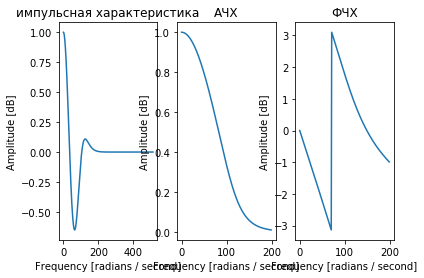

In [2]:
#@title 21
import numpy as np
from math import *
import matplotlib.pyplot as plt
from scipy import signal

#число периодов на отрезке
P = 10
#количество точек на графике
N = 100
k = P/(N*0.5)
#пустые массивы значений
X1 = np.array(0) 
S1 = np.array(0)
X2 = np.array(0) 
S2 = np.array(0)
#частота пропускания и частота заграждения
wp, ws = 0.01, 0.2
#усиление в полосе пропускания и подавление вне её
gpass, gstop = 0.1, 50.0

order_of_the_filter =11


b, a = signal.bessel(6, 0.2, 'low', analog=False)
w, h = signal.freqz(b, a)

  
plt.subplot(1, 3, 1)
plt.plot(h)
plt.title('импульсная характеристика')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 2)
plt.plot(np.abs(h[:200]))
plt.title('АЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')

plt.subplot(1, 3, 3)
plt.plot(np.angle(h[:200]))
plt.title('ФЧХ')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.show()